# 1. Import required modules

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
import skimage
from skimage.filters.thresholding import threshold_li,threshold_local,threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, remove_small_objects, ball
from skimage.morphology import disk
from scipy import ndimage as ndi
import sys,os, glob

#import skimage.filters.median

#import skimage.segmentation as seg
#import skimage.filters as filters
#import skimage.draw as draw
#import skimage.color as color

#from skimage.filters.thresholding import _cross_entropy
#from skimage.morphology import black_tophat, skeletonize, convex_hull_image


#pip install nd2reader_required for nd2 file reading
from nd2reader import ND2Reader

import pandas as pd

# 2. Load all analysis excels:

# load combined if already generated




In [43]:
data_folder = r'D:\Analyzed_CellBio\Stam\Dam_analysis_batchB'
filename ='Updated_measurement_for_all_background_subtracted_2_100_crop_Pol2_analyzed.xlsx'
analysis_df = pd.read_excel(data_folder + os.sep + filename,index_col= None)

### Combine exp1  211004IF_210921exp_DamMN

In [182]:
data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211004IF_210921exp_DamMN\analysis_subset_controlled\*"



sub_folders = [_fd for _fd in glob.glob(data_save_folder)]

sub_folders = sorted(sub_folders, key=lambda x: int(x.split('well')[-1]))

combined_df_1 =pd.DataFrame()

for _fd in sub_folders:
    
    
    analysis_excel_name = (_fd + os.sep + 
                           r"measurement_for_all_fov_background_subtracted_2_100_crop.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_1=  pd.concat([combined_df_1,df])
   

In [183]:
sub_folders

['D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211004IF_210921exp_DamMN\\analysis_subset_controlled\\well3',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211004IF_210921exp_DamMN\\analysis_subset_controlled\\well4',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211004IF_210921exp_DamMN\\analysis_subset_controlled\\well5',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211004IF_210921exp_DamMN\\analysis_subset_controlled\\well6',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211004IF_210921exp_DamMN\\analysis_subset_controlled\\well7',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211004IF_210921exp_DamMN\\analysis_subset_controlled\\well8',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211004IF_210921exp_DamMN\\analysis_subset_controlled\\well9',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211004IF_210921exp_DamMN\\analysis_subset_controlled\\well10',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211004IF_210921exp_DamMN\\analysis_subset_co

In [184]:
combined_df_1.insert (1, 'batch_name','211004IF_210921exp_DamMN')

combined_df_1

,Unnamed: 0,batch_name,exp_name,position_id,cell_id,cell_xyz_coord,area_incorporated_chr,area_h2ax_within_incorporated_chr,area_less_h2ax_within_incorporated_chr,area_control_chr,...,ave_intensity_subset_control_chr_H2ax,ave_intensity_h2ax_pos_incorporated_chr_H2ax,ave_intensity_h2ax_less_incorporated_chr_H2ax,ave_intensity_incorporated_chr_Pol2S5,ave_intensity_control_chr_Pol2S5,ave_intensity_nucleo-excluded_control_chr_Pol2S5,ave_intensity_nucleolus_Pol2S5,ave_intensity_subset_control_chr_Pol2S5,ave_intensity_h2ax_pos_incorporated_chr_Pol2S5,ave_intensity_h2ax_less_incorporated_chr_Pol2S5
0,0,211004IF_210921exp_DamMN,well3_doxPlusAID,well3_m6T-488 H2AX-568 RNApol647_.nd2_Pos1,1,"[[1093, 864], 6]",159,3,156,11346,...,72.590411,NaN,114.779872,963.325482,507.042949,584.028386,228.189061,492.881474,NaN,1012.506402
1,0,211004IF_210921exp_DamMN,well3_doxPlusAID,well3_m6T-488 H2AX-568 RNApol647_.nd2_Pos2,1,"[[962, 867], 5]",195,141,54,9322,...,63.818879,800.883653,NaN,416.650233,363.564817,416.606040,155.250053,300.547310,381.448523,NaN
2,0,211004IF_210921exp_DamMN,well3_doxPlusAID,well3_m6T-488 H2AX-568 RNApol647_001.nd2_Pos1,1,"[[1117, 1009], 7]",1120,95,1025,26039,...,203.403373,NaN,78.459669,110.085576,256.974628,291.732525,74.452337,281.486778,NaN,88.960593
3,0,211004IF_210921exp_DamMN,well3_doxPlusAID,well3_m6T-488 H2AX-568 RNApol647_002.nd2_Pos1,1,"[[1040, 930], 7]",268,180,88,8894,...,58.252523,1314.366138,NaN,413.538606,372.987239,438.986268,118.346371,505.099571,420.345591,NaN
4,0,211004IF_210921exp_DamMN,well3_doxPlusAID,well3_m6T-488 H2AX-568 RNApol647_004.nd2_Pos1,1,"[[980, 926], 7]",307,0,307,9408,...,91.364277,NaN,110.591702,514.113363,335.709542,394.684777,105.988636,465.217804,NaN,542.335587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0,211004IF_210921exp_DamMN,well10_doxPlusAID,well10_m6T-488 H2AX-568 RNApol647_.nd2_Pos2,1,"[[1070, 1000], 6]",799,469,330,10673,...,694.176769,3460.739439,1899.716183,727.229446,608.718619,719.154913,174.816881,807.955606,675.742559,852.939295
0,0,211004IF_210921exp_DamMN,well11_doxPlusAID,well11_m6T-488 H2AX-568 RNApol647_001.nd2_Pos1,1,"[[1290, 740], 9]",374,10,364,18844,...,63.658882,NaN,128.785623,414.141960,205.389902,233.021772,58.577446,162.344209,NaN,402.212765
0,0,211004IF_210921exp_DamMN,well12_doxPlusAID,well12_m6T-488 H2AX-568 RNApol647_.nd2_Pos1,1,"[[1100, 1060], 7]",571,202,369,10841,...,659.512505,1938.907254,1343.348554,424.098476,481.964789,562.838340,152.854066,526.586732,442.670351,413.849918
1,0,211004IF_210921exp_DamMN,well12_doxPlusAID,well12_m6T-488 H2AX-568 RNApol647_.nd2_Pos4,1,"[[1160, 1050], 6]",667,6,661,14581,...,468.511384,NaN,281.180090,807.675300,679.400653,808.747791,169.543712,990.428172,NaN,794.049061


In [185]:
len(combined_df_1)

161

### Combined exp2 211007IF_210922exp_DamMN

In [186]:
# Common parameters for loading the image files of interest

# for 4 channels nd2 images: channel index order is 1-2-3-4, which is the order as ch405-ch488-ch560-ch647


data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211007IF_210922exp_DamMN\analysis_subset_controlled\*"



sub_folders = [_fd for _fd in glob.glob(data_save_folder)]

sub_folders = sorted(sub_folders, key=lambda x: int(x.split('well')[-1]))

combined_df_2 =pd.DataFrame()

for _fd in sub_folders:
    
    
    analysis_excel_name = (_fd + os.sep + 
                           r"measurement_for_all_fov_background_subtracted_2_100_crop.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_2=  pd.concat([combined_df_2,df])
   

In [187]:
sub_folders

['D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211007IF_210922exp_DamMN\\analysis_subset_controlled\\well3',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211007IF_210922exp_DamMN\\analysis_subset_controlled\\well4',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211007IF_210922exp_DamMN\\analysis_subset_controlled\\well5',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211007IF_210922exp_DamMN\\analysis_subset_controlled\\well6',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchB\\211007IF_210922exp_DamMN\\analysis_subset_controlled\\well7']

In [188]:
combined_df_2.insert (1, 'batch_name','211007IF_210922exp_DamMN')

In [189]:
len(combined_df_2)

203

### Combined exp3 211012IF_210927exp_DamMN

In [190]:
# Common parameters for loading the image files of interest

# for 4 channels nd2 images: channel index order is 1-2-3-4, which is the order as ch405-ch488-ch560-ch647




data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211012IF_210927exp_DamMN\analysis_subset_controlled\*"



sub_folders = [_fd for _fd in glob.glob(data_save_folder)]

sub_folders = sorted(sub_folders, key=lambda x: int(x.split('well')[-1]))

combined_df_3 =pd.DataFrame()

for _fd in sub_folders:
    
    
    analysis_excel_name = (_fd + os.sep + 
                           r"measurement_for_all_fov_background_subtracted_2_100_crop.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_3=  pd.concat([combined_df_3,df])

In [191]:
combined_df_3.insert (1, 'batch_name','211012IF_210927exp_DamMN')

In [192]:
len(combined_df_3)

50

### Combined exp4 210225IF_210201exp_Dam

In [193]:
# Combine all dfs from all exp/batch B

In [194]:
# Common parameters for loading the image files of interest

# for 4 channels nd2 images: channel index order is 1-2-3-4, which is the order as ch405-ch488-ch560-ch647




data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\210225IF_210201exp_Dam\analysis_subset_controlled\*"



sub_folders = [_fd for _fd in glob.glob(data_save_folder)]

sub_folders = sorted(sub_folders, key=lambda x: int(x.split('well')[-1]))

combined_df_4 =pd.DataFrame()

for _fd in sub_folders:
    
    
    analysis_excel_name = (_fd + os.sep + 
                           r"measurement_for_all_fov_background_subtracted_2_100_crop.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_4=  pd.concat([combined_df_4,df])





In [195]:
len (combined_df_4)

55

In [196]:
combined_df_4.insert (1, 'batch_name','210225IF_210201exp_Dam')

In [197]:
combined_df_4

,Unnamed: 0,batch_name,exp_name,position_id,cell_id,cell_xyz_coord,area_incorporated_chr,area_h2ax_within_incorporated_chr,area_less_h2ax_within_incorporated_chr,area_control_chr,...,ave_intensity_subset_control_chr_H2ax,ave_intensity_h2ax_pos_incorporated_chr_H2ax,ave_intensity_h2ax_less_incorporated_chr_H2ax,ave_intensity_incorporated_chr_Pol2S5,ave_intensity_control_chr_Pol2S5,ave_intensity_nucleo-excluded_control_chr_Pol2S5,ave_intensity_nucleolus_Pol2S5,ave_intensity_subset_control_chr_Pol2S5,ave_intensity_h2ax_pos_incorporated_chr_Pol2S5,ave_intensity_h2ax_less_incorporated_chr_Pol2S5
0,0,210225IF_210201exp_Dam,well5_doxPlusAID_60x,dox+AIDsm_60x_005.nd2_Pos1,1,"[[1034, 1081], 8]",914,261,653,19729,...,41.223564,223.286819,68.348969,36.668383,65.993986,76.087493,16.826980,86.925400,36.000350,35.630639
1,0,210225IF_210201exp_Dam,well5_doxPlusAID_60x,dox+AIDsm_60x_005.nd2_Pos2,1,"[[1005, 1172], 7]",242,44,198,14376,...,96.116652,NaN,118.581238,124.892612,124.498814,145.651870,47.791139,125.348259,NaN,156.533108
2,0,210225IF_210201exp_Dam,well5_doxPlusAID_60x,dox+AIDsm_60x_005.nd2_Pos4,1,"[[995, 1047], 8]",535,290,245,14956,...,196.886961,721.893276,366.336132,217.700778,136.899846,161.236906,37.384431,140.044539,213.657304,234.037095
3,0,210225IF_210201exp_Dam,well5_doxPlusAID_60x,dox+AIDsm_60x_005.nd2_Pos5,1,"[[979, 1120], 7]",346,140,206,13832,...,171.376492,754.467318,299.548637,203.559260,249.371805,288.048029,57.135220,338.751655,188.369086,198.059196
4,0,210225IF_210201exp_Dam,well5_doxPlusAID_60x,dox+AIDsm_60x_005.nd2_Pos5,2,"[[1031, 1287], 7]",224,96,128,11334,...,159.206259,644.624664,259.365405,234.850701,155.319123,181.506483,38.512561,307.651017,252.568128,223.260721
5,0,210225IF_210201exp_Dam,well5_doxPlusAID_60x,dox+AIDsm_60x_006.nd2_Pos1,1,"[[1052, 1016], 8]",268,10,258,8214,...,149.126059,NaN,165.768627,86.910923,113.651084,131.565030,28.816364,184.353087,NaN,79.456109
0,0,210225IF_210201exp_Dam,well9_doxPlusAID_60x,well9_DoxPlusAID_m6T-488 H2AX-568 PolSe-647_00...,1,"[[694, 1184], 6]",342,94,248,11690,...,54.402074,NaN,124.045827,65.953458,97.545567,110.133642,36.757225,100.066609,NaN,65.760218
1,0,210225IF_210201exp_Dam,well9_doxPlusAID_60x,well9_DoxPlusAID_m6T-488 H2AX-568 PolSe-647_00...,1,"[[686, 1029], 5]",1788,103,1685,29521,...,164.456493,NaN,351.676943,199.333434,270.106179,310.460031,86.645166,393.183229,NaN,193.355971
2,0,210225IF_210201exp_Dam,well9_doxPlusAID_60x,well9_DoxPlusAID_m6T-488 H2AX-568 PolSe-647_00...,1,"[[822, 1136], 3]",441,120,321,15680,...,243.383627,744.308559,284.603831,346.218009,425.667216,493.274545,124.630009,556.843487,474.333929,252.467008
3,0,210225IF_210201exp_Dam,well9_doxPlusAID_60x,well9_DoxPlusAID_m6T-488 H2AX-568 PolSe-647_00...,1,"[[1008, 1088], 3]",284,174,110,10238,...,103.670747,1255.847166,NaN,345.637771,399.047726,472.304682,89.454982,336.546162,346.666372,NaN


# Combine all experiments

In [198]:
combined_df=pd.DataFrame()

df_to_combine = [combined_df_1,combined_df_2,combined_df_3,combined_df_4]

for _df in df_to_combine:
    combined_df = pd.concat([combined_df,_df])

In [199]:
len(combined_df)

469

In [200]:

combined_df.to_excel(r'D:\Analyzed_CellBio\Stam\Dam_analysis_batchB'
                     + os.sep + 'Updated_measurement_for_all_background_subtracted_2_100_crop_Pol2.xlsx')



# Prelim posthoc analysis

In [201]:
# save normalized Pol2

analysis_df=combined_df.copy()

# for total incorporated chr
analysis_df['normalized_inc_Pol2S5']=analysis_df['ave_intensity_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_inc_Pol2S5'].mean())

# for h2ax-positive area with incorporated chr
#analysis_df['normalized_inc_h2ax_pos_Pol2S5']=analysis_df['ave_intensity_h2ax_pos_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
#print(analysis_df['normalized_inc_h2ax_pos_Pol2S5'].mean())

# for h2ax-less (positive) area with incorporated chr
#analysis_df['normalized_inc_h2ax_less_Pol2S5']=analysis_df['ave_intensity_h2ax_less_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
#print(analysis_df['normalized_inc_h2ax_less_Pol2S5'].mean())

# for nucleoli
#analysis_df['normalized_nucleoli_Pol2S5']=analysis_df['ave_intensity_nucleolus_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
#print(analysis_df['normalized_nucleoli_Pol2S5'].mean())

# for subset control
analysis_df['normalized_subset_control_Pol2S5']=analysis_df['ave_intensity_subset_control_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_subset_control_Pol2S5'].mean())



# save normalized h2ax

# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_h2ax'] = analysis_df['ave_intensity_incorporated_chr_H2ax']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H2ax']
print(analysis_df['normalized_inc_h2ax'].mean())


# for subset control
analysis_df['normalized_subset_control_h2ax']=analysis_df['ave_intensity_subset_control_chr_H2ax']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H2ax']
print(analysis_df['normalized_subset_control_h2ax'].mean())


# save the analyzed df
#analysis_savename = f'measurement_for_all_fov_background_subtracted_{small_53BP_size}_crop_Pol2_analyzed.xlsx'
#analysis_save_path = data_save_folder[:-2] + os.sep + 'analysis' + os.sep + f'{data_name}' 
#analysis_save_path = data_save_folder[:-2] + os.sep + 'analysis' + os.sep + data_name.split('_')[0]



0.7539739940995447
1.005050037570862
4.091389237176239
0.9741495423827158


In [3]:
analysis_df.columns

Index(['Unnamed: 0', 'batch_name', 'exp_name', 'position_id', 'cell_id',
       'cell_xyz_coord', 'area_incorporated_chr',
       'area_h2ax_within_incorporated_chr',
       'area_less_h2ax_within_incorporated_chr', 'area_control_chr',
       'area_nucleo-excluded_control_chr', 'area_nucleolus',
       'area_subset_control_ctrl', 'ave_intensity_incorporated_chr_dna',
       'ave_intensity_control_chr_dna',
       'ave_intensity_nucleo-excluded_control_chr_dna',
       'ave_intensity_nucleolus_dna', 'ave_intensity_subset_control_chr_dna',
       'ave_intensity_h2ax_pos_incorporated_chr_dna',
       'ave_intensity_h2ax_less_incorporated_chr_dna',
       'ave_intensity_incorporated_chr_m6T', 'ave_intensity_control_chr_m6T',
       'ave_intensity_nucleo-excluded_control_chr_m6T',
       'ave_intensity_nucleolus_m6T', 'ave_intensity_subset_control_chr_m6T',
       'ave_intensity_h2ax_pos_incorporated_chr_m6T',
       'ave_intensity_h2ax_less_incorporated_chr_m6T',
       'ave_intensity_inco

In [44]:
analysis_df.columns

Index(['Unnamed: 0', 'batch_name', 'exp_name', 'position_id', 'cell_id',
       'cell_xyz_coord', 'area_incorporated_chr',
       'area_h2ax_within_incorporated_chr',
       'area_less_h2ax_within_incorporated_chr', 'area_control_chr',
       'area_nucleo-excluded_control_chr', 'area_nucleolus',
       'area_subset_control_ctrl', 'ave_intensity_incorporated_chr_dna',
       'ave_intensity_control_chr_dna',
       'ave_intensity_nucleo-excluded_control_chr_dna',
       'ave_intensity_nucleolus_dna', 'ave_intensity_subset_control_chr_dna',
       'ave_intensity_h2ax_pos_incorporated_chr_dna',
       'ave_intensity_h2ax_less_incorporated_chr_dna',
       'ave_intensity_incorporated_chr_m6T', 'ave_intensity_control_chr_m6T',
       'ave_intensity_nucleo-excluded_control_chr_m6T',
       'ave_intensity_nucleolus_m6T', 'ave_intensity_subset_control_chr_m6T',
       'ave_intensity_h2ax_pos_incorporated_chr_m6T',
       'ave_intensity_h2ax_less_incorporated_chr_m6T',
       'ave_intensity_inco

In [48]:
np.percentile(analysis_df['h2ax_damage_level'],25)

#np.percentile(analysis_df['h2ax_damage_level'],75)




0.1945392491467577

In [49]:
analysis_df['h2ax_damage_level']=analysis_df['area_h2ax_within_incorporated_chr']/analysis_df['area_incorporated_chr']

damaged_chr_df = analysis_df[analysis_df['h2ax_damage_level']>=0.65]

partial_damaged_chr_df = analysis_df[analysis_df['h2ax_damage_level']<0.65]

med_damaged_chr_df = partial_damaged_chr_df[partial_damaged_chr_df['h2ax_damage_level']>=0.19]

no_damaged_chr_df = partial_damaged_chr_df[partial_damaged_chr_df['h2ax_damage_level']<0.19]

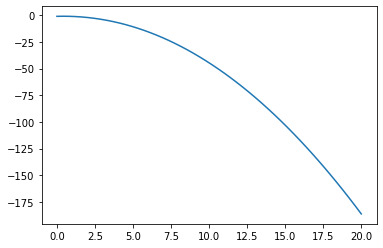

In [9]:
damage_level = analysis_df['h2ax_damage_level']


%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot

a = np.array(damage_level).reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(a)
s = linspace(0,20)
e = kde.score_samples(s.reshape(-1,1))
plot(s, e)

In [204]:
analysis_df.to_excel(r'D:\Analyzed_CellBio\Stam\Dam_analysis_batchB'
                     + os.sep + 'Updated_measurement_for_all_background_subtracted_2_100_crop_Pol2_analyzed.xlsx', index=False)

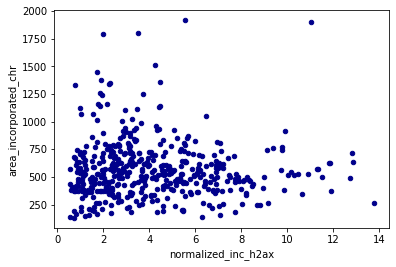

In [3]:
#analysis_df['normalized_inc_H2ax'] = analysis_df['ave_intensity_incorporated_chr_H2ax']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H2ax']
#analysis_df


analysis_df.plot.scatter(x='normalized_inc_h2ax',y='area_incorporated_chr',c='DarkBlue')

SpearmanrResult(correlation=-0.22196057356425733, pvalue=1.2055160924279251e-06)

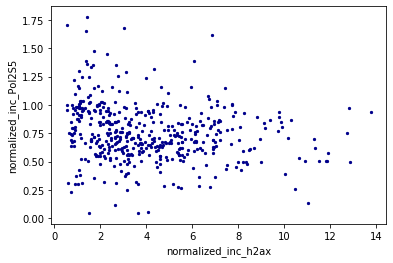

In [41]:
analysis_df.plot.scatter(x='normalized_inc_h2ax',y='normalized_inc_Pol2S5',c='DarkBlue',s=5)


from scipy import stats
stats.spearmanr(analysis_df['normalized_inc_h2ax'],analysis_df['normalized_inc_Pol2S5'])

SpearmanrResult(correlation=-0.23082122379717177, pvalue=4.3305206170223006e-07)

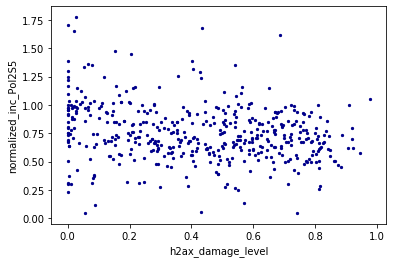

In [39]:
analysis_df.plot.scatter(x='h2ax_damage_level',y='normalized_inc_Pol2S5',c='DarkBlue', s=5)


from scipy import stats
stats.spearmanr(analysis_df['h2ax_damage_level'],analysis_df['normalized_inc_Pol2S5'])


#0.23*0.23

174
three samples comparision: KruskalResult(statistic=269.9048499232176, pvalue=3.236325105838351e-58)
MW comparision: 0.3168294831547649, 1.1846184894157993e-05,0.00020621939520872707,0.00020621939520872707


c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


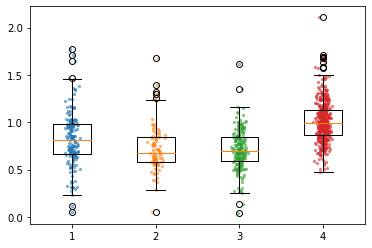

In [35]:
damage_negative_chr_df = analysis_df[analysis_df['h2ax_damage_level'] <0.3]
print(len(damage_negative_chr_df))

damage_intermediate_chr_df = analysis_df[analysis_df['h2ax_damage_level'] <= 0.5]
damage_intermediate_chr_df =damage_intermediate_chr_df[damage_intermediate_chr_df['h2ax_damage_level']>=0.3]

damage_positive_chr_df = analysis_df[analysis_df['h2ax_damage_level'] > 0.5]
#len(damage_negative_chr_df)


# For Pol2S5
g1 = damage_negative_chr_df['normalized_inc_Pol2S5']
g2 = damage_intermediate_chr_df['normalized_inc_Pol2S5']
g3 = damage_positive_chr_df['normalized_inc_Pol2S5']
g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
sp_low = min(len(g1),len(g2), len(g3))

downsample = False
if downsample:
    g1 = np.random.choice(g1, sp_low)
    g2 = np.random.choice(g2, sp_low)
    g3 = np.random.choice(g3, sp_low)
    g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2,g3,g4], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2,g3,g4]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)


from scipy.stats import kruskal, mannwhitneyu
p0 = kruskal(g1,g2,g3,g4)



print(f"three samples comparision: {p0}")


U1, p1 = mannwhitneyu(g2,g3)
U1, p2 = mannwhitneyu(g1,g3)
U1, p3 = mannwhitneyu(g1,g2)
U1, p4 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}, {p2},{p3},{p4}")

In [9]:
damage_positive_chr_df = analysis_df[analysis_df['h2ax_damage_level'] > 0.5]

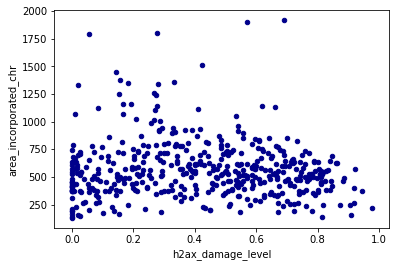

In [15]:
analysis_df.plot.scatter(x='h2ax_damage_level',y='area_incorporated_chr',c='DarkBlue')

In [207]:
print(damaged_chr_df['normalized_inc_Pol2S5'].mean())
print(damaged_chr_df['normalized_inc_h2ax'].mean())
print(damaged_chr_df['area_incorporated_chr'].mean())



print(no_damaged_chr_df['normalized_inc_Pol2S5'].mean())
print(no_damaged_chr_df['normalized_inc_h2ax'].mean())
print(no_damaged_chr_df['area_incorporated_chr'].mean())


print(analysis_df['normalized_subset_control_Pol2S5'].mean())
print(analysis_df['normalized_subset_control_h2ax'].mean())
print(analysis_df['area_subset_control_ctrl'].mean())



#len(damaged_chr_df)
#len(med_damaged_chr_df)
#len(no_damaged_chr_df)

#len(analysis_df)

#no_damaged_chr_df['area_incorporated_chr'].mean()
#damaged_chr_df['area_incorporated_chr'].mean()

#analysis_df['area_h2ax_within_incorporated_chr'].mean()

#analysis_df['area_non_h2ax_within_incorporated_chr'].mean()

0.7127060482487955
6.136548555093143
536.3365853658537
0.8480675377399159
1.4585402953838744
538.05
1.005050037570862
0.9741495423827158
613.5053304904051


In [20]:
from scipy.stats import mannwhitneyu

MW comparision: 2.2526134113240955e-08
three samples comparision: KruskalResult(statistic=278.72062156033644, pvalue=4.005534857314472e-60)


c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


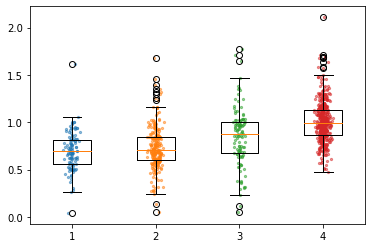

In [51]:
# For Pol2S5
g1 = damaged_chr_df['normalized_inc_Pol2S5']
g2 = med_damaged_chr_df['normalized_inc_Pol2S5']
g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2,g3,g4], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2,g3,g4]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)


from scipy.stats import kruskal, mannwhitneyu
p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g3,g4)

print(f"MW comparision: {p1}")



print(f"three samples comparision: {p4}")

357 112 469
MW comparision: 0.002513021427805931, 1.9469458222992965e-13,0.00012760685536461296
three samples comparision: KruskalResult(statistic=49.24363629007366, pvalue=2.027123671909772e-11)


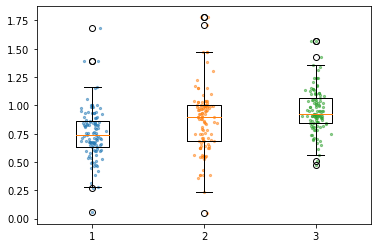

In [35]:
g4 = analysis_df['normalized_subset_control_Pol2S5']

np.mean(g4) + 3 *np.std(g4)


new_damaged_df  = analysis_df[analysis_df['normalized_inc_h2ax']>=2]

new_no_damaged_df  = analysis_df[analysis_df['normalized_inc_h2ax']<2]




# For Pol2S5
g1 = new_damaged_df['normalized_inc_Pol2S5']
g2 = new_no_damaged_df['normalized_inc_Pol2S5']
g3 = analysis_df['normalized_subset_control_Pol2S5']

print(len(g1),len(g2),len(g3))

#sp_low = min(len(g1),len(g2),len(g3))
sp_low = min(len(g1),len(g2), len(g3))

g1 = np.random.choice(g1, sp_low)
g2 = np.random.choice(g2, sp_low)
g3 = np.random.choice(g3, sp_low)


boxplot_pol2= plt.boxplot([g1,g2,g3], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2,g3]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)


from scipy.stats import kruskal
p4 = kruskal(g1,g2,g3)

U1, p1 = mannwhitneyu(g2,g3)
U1, p2 = mannwhitneyu(g1,g3)
U1, p3 = mannwhitneyu(g1,g2)
print(f"MW comparision: {p1}, {p2},{p3}")



print(f"three samples comparision: {p4}")

In [10]:
factor_name = 'Pol2S5'


col_name1 = f'damaged_chr_{factor_name}'
col_name2 = f'med_damaged_chr_{factor_name}'
col_name3 = f'no_damaged_chr_{factor_name}'
col_name4 = f'radomized_chr_{factor_name}'

df = pd.DataFrame()
#df = pd.DataFrame(columns = [col_name1, col_name2, col_name3])
df = pd.DataFrame(columns = [col_name1, col_name2, col_name3, col_name4])

df[col_name1] = g1.tolist()
df[col_name2] = g2.tolist()
df[col_name3] = g3.tolist()
df[col_name4] = g4.tolist()

df.to_excel (r'D:\Analyzed_CellBio\Stam\Dam_analysis_batchB'
                     + os.sep + 
             f'Updated_measurement_to_use_for_{factor_name}_3class_figure.xlsx', index=False)

MW comparision: 0.44270408073356965
three samples comparision: KruskalResult(statistic=309.2930851117796, pvalue=9.691310186907157e-67)


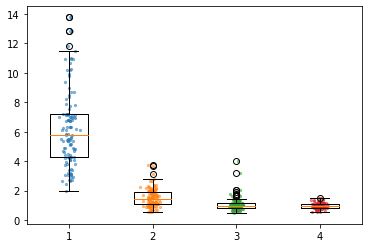

In [11]:
#For h2ax 

g1 = damaged_chr_df['normalized_inc_h2ax']
g2 = med_damaged_chr_df['normalized_inc_h2ax']
g2 = no_damaged_chr_df['normalized_inc_h2ax']
g3 = analysis_df['normalized_subset_control_h2ax']

sp_low = min(len(g1),len(g2), len(g3))

g1 = np.random.choice(g1, sp_low)
g2 = np.random.choice(g2, sp_low)
g3 = np.random.choice(g3, sp_low)
g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2,g3,g4], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2,g3,g4]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)


from scipy.stats import kruskal, mannwhitneyu
p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g3,g4)

print(f"MW comparision: {p1}")



print(f"three samples comparision: {p4}")



factor_name = 'h2ax'

col_name1 = f'damaged_chr_{factor_name}'
col_name2 = f'med_damaged_chr_{factor_name}'
col_name3 = f'no_damaged_chr_{factor_name}'
col_name4 = f'radomized_chr_{factor_name}'

df = pd.DataFrame()
#df = pd.DataFrame(columns = [col_name1, col_name2, col_name3])
df = pd.DataFrame(columns = [col_name1, col_name2, col_name3, col_name4])

df[col_name1] = g1.tolist()
df[col_name2] = g2.tolist()
df[col_name3] = g3.tolist()
df[col_name4] = g4.tolist()

df.to_excel (r'D:\Analyzed_CellBio\Stam\Dam_analysis_batchB'
                     + os.sep + 
             f'Updated_measurement_to_use_for_{factor_name}_3class_figure.xlsx', index=False)


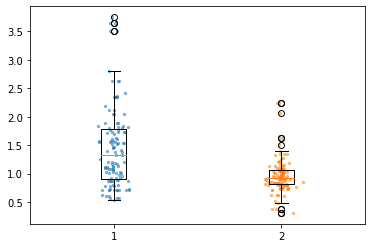

In [320]:
g2 = no_damaged_chr_df['normalized_inc_h2ax']
g3 = analysis_df['normalized_subset_control_h2ax']

#sp_low = min(len(g1),len(g2),len(g3))
sp_low = min(len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
g2 = np.random.choice(g2, sp_low)
g3 = np.random.choice(g3, sp_low)

boxplot_pol2= plt.boxplot([g2,g3], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g2,g3]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)



In [301]:
print(no_damaged_chr_df['normalized_inc_h2ax'].mean())
print(analysis_df['normalized_subset_control_h2ax'].mean() + 3*analysis_df['normalized_subset_control_h2ax'].std())




1.4585402953838744
1.9198274337121695


In [319]:
len(no_damaged_chr_df['normalized_inc_h2ax'])

len(no_damaged_chr_df[no_damaged_chr_df['normalized_inc_h2ax']<1.4585])

66

In [305]:
#g1 = damaged_chr_df['normalized_inc_h2ax']
g2 = no_damaged_chr_df[no_damaged_chr_df['normalized_inc_h2ax']>1.4585]['normalized_inc_h2ax']
g3 = analysis_df['normalized_subset_control_h2ax']

#sp_low = min(len(g1),len(g2),len(g3))
sp_low = min(len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
g2 = np.random.choice(g2, sp_low)
g3 = np.random.choice(g3, sp_low)

boxplot_pol2= plt.boxplot([g2,g3], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g2,g3]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)


from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

54

MW comparision: 0.33190130408788787


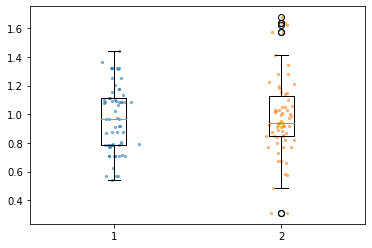

In [318]:
#g1 = damaged_chr_df['normalized_inc_h2ax']
g2 = no_damaged_chr_df[no_damaged_chr_df['normalized_inc_h2ax']<1.4585]['normalized_inc_h2ax']
g3 = analysis_df['normalized_subset_control_h2ax']

#sp_low = min(len(g1),len(g2),len(g3))
sp_low = min(len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
g2 = np.random.choice(g2, sp_low)
g3 = np.random.choice(g3, sp_low)

boxplot_pol2= plt.boxplot([g2,g3], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g2,g3]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)


from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3)

U1, p1 = mannwhitneyu(g2,g3)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")



MW comparision: 0.037755681188236044


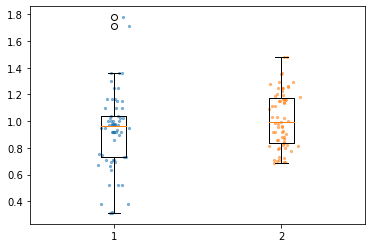

In [316]:
g2 = no_damaged_chr_df[no_damaged_chr_df['normalized_inc_h2ax']<1.4585]['normalized_inc_Pol2S5']
g3 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
sp_low = min(len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
g2 = np.random.choice(g2, sp_low)
g3 = np.random.choice(g3, sp_low)

boxplot_pol2= plt.boxplot([g2,g3], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g2,g3]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)


from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3)

U1, p1 = mannwhitneyu(g2,g3)

print(f"MW comparision: {p1}")



MW comparision: 0.0018092454236283608


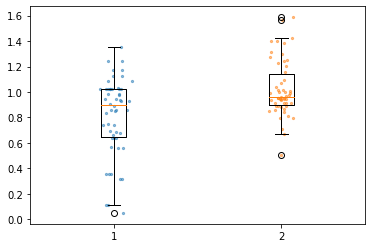

In [322]:
g2 = no_damaged_chr_df[no_damaged_chr_df['normalized_inc_h2ax']>1.4585]['normalized_inc_Pol2S5']
g3 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
sp_low = min(len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
g2 = np.random.choice(g2, sp_low)
g3 = np.random.choice(g3, sp_low)

boxplot_pol2= plt.boxplot([g2,g3], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g2,g3]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)


from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3)

U1, p1 = mannwhitneyu(g2,g3)

print(f"MW comparision: {p1}")

three samples comparision: KruskalResult(statistic=7.046594007000187, pvalue=0.029502006426249852)


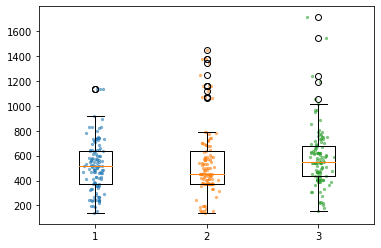

In [252]:
#For area

g1 = damaged_chr_df['area_incorporated_chr']
g2 = no_damaged_chr_df['area_incorporated_chr']
g3 = analysis_df['area_subset_control_ctrl']

#sp_low = min(len(g1),len(g2),len(g3))
sp_low = min(len(g1),len(g2), len(g3))

g1 = np.random.choice(g1, sp_low)
g2 = np.random.choice(g2, sp_low)
g3 = np.random.choice(g3, sp_low)

boxplot_pol2= plt.boxplot([g1,g2,g3], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2,g3]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)


from scipy.stats import kruskal
p4 = kruskal(g1,g2,g3)

#U1, p1 = mannwhitneyu(g1,g2)

#print(f"MW comparision: {p1}")



print(f"three samples comparision: {p4}")





factor_name = 'area'


col_name1 = f'damaged_chr_{factor_name}'
col_name2 = f'no_damaged_chr_{factor_name}'
col_name3 = f'radomized_chr_{factor_name}'


df = pd.DataFrame(columns = [col_name1, col_name2, col_name3])

df[col_name1] = g1
df[col_name2] = g2
df[col_name3] = g3

df.to_excel (r'D:\Analyzed_CellBio\Stam\Dam_analysis_batchB'
                     + os.sep + 
             f'Updated_measurement_to_use_for_{factor_name}_figure.xlsx', index=False)


three samples comparision: KruskalResult(statistic=28.23301139565077, pvalue=7.400813696362127e-07)
MW comparision: 0.02802234985191843


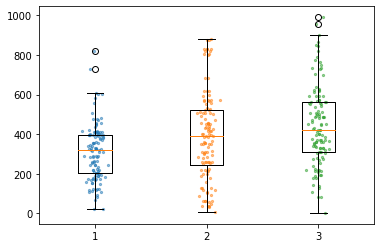

In [296]:
# actual intensity

 #'ave_intensity_incorporated_chr_H2ax', 'ave_intensity_control_chr_H2ax',
       #'ave_intensity_nucleo-excluded_control_chr_H2ax',
       #'ave_intensity_nucleolus_H2ax', 'ave_intensity_subset_control_chr_H2ax',


g1 = damaged_chr_df['ave_intensity_incorporated_chr_Pol2S5']
g2 = no_damaged_chr_df['ave_intensity_incorporated_chr_Pol2S5']
g3 = analysis_df['ave_intensity_subset_control_chr_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
sp_low = min(len(g1),len(g2), len(g3))

g1 = np.random.choice(g1, sp_low)
g2 = np.random.choice(g2, sp_low)
g3 = np.random.choice(g3, sp_low)

boxplot_pol2= plt.boxplot([g1,g2,g3], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2,g3]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)


from scipy.stats import kruskal
p4 = kruskal(g1,g2,g3)

#U1, p1 = mannwhitneyu(g1,g2)

#print(f"MW comparision: {p1}")



print(f"three samples comparision: {p4}")


U1, p1 = mannwhitneyu(g2,g3)

print(f"MW comparision: {p1}")


factor_name = 'ave_itensity_Pol2S5'


col_name1 = f'damaged_chr_{factor_name}'
col_name2 = f'no_damaged_chr_{factor_name}'
col_name3 = f'radomized_chr_{factor_name}'


df = pd.DataFrame(columns = [col_name1, col_name2, col_name3])

df[col_name1] = g1
df[col_name2] = g2
df[col_name3] = g3




#df.to_excel (r'D:\Analyzed_CellBio\Stam\Dam_analysis_batchB'
                  #   + os.sep + 
            # f'Updated_measurement_to_use_for_{factor_name}_figure.xlsx', index=False)

In [256]:
np.random.randint(100,300)

113